# What time is it? 


We consider two clocks that indicate, respectively, the times $T_1$ and $T_2$, considered as independant random variables with gaussian probability density of mean $<T_1> = <T_2> = T_t$ and respective variances $\sigma_1^2 = <T_1^2> - <T_1>^2$ and $\sigma_2^2 = <T_2^2> - <T_2>^2$. 

The analysis $T_a$ is the "Best Linear Unbiased Estimation" (BLUE) given by $T_a = {C_1 \, T_1 + C_2 \, T_2 \over C_1 + C_2}$ are the "certainties" $C_1 = 1/\sigma_1^2$ and $C_2=1/\sigma_2^2$. The "certainty" $C_a=1/\sigma_a^2$ of the analysis, with $\sigma_a^2=<T_a^2> - <T_a>^2$, is given by $C_a= C_1+C_2$.

This programs shows:
*   Histograms of $T_1$, $T_2$ and $T_a$ for several samples of $T_1$ and $T_2$
*   A count of the improvements taking into account two measurments rather than only the most accurate one
*   The convergence of the estimation of $\sigma_a$ when increasing the number of samples.



**References:**

*   O. Thual, "[Introduction to Data Assimilation for Scientists and Engineers](http://pedagotech.inp-toulouse.fr/130202/co/module_idase.html)", Open Learn. Res. Ed. INP 0202 (2013) 6h


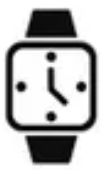
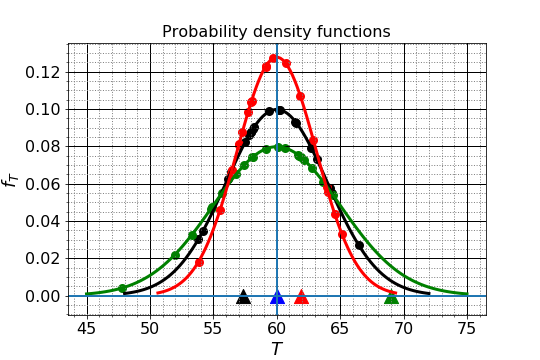
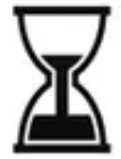

# Compilation of the subroutines

Execute first the code below to define the functions!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inifig(xdim,ydim):
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)

def fT(T,Tt,sig):
    # Gaussian probability density function 
    K=1/(np.sqrt(2*np.pi)*sig)
    f = K*np.exp(-(T-Tt)**2/(2*sig**2))
    return f,K

def val(Tt,sig,col) :
    # Ploting the probability density functions
    T = np.linspace(Tt-3*sig, Tt+3*sig, 100)
    f,K=fT(T,Tt,sig)
    plt.plot(T, f, color=col, linewidth=3)
    # Random sampling
    Tr = np.random.normal(Tt,sig,20)
    fR,KR=fT(Tr,Tt,sig)
    plt.scatter(Tr,fR,marker='o',linewidth=3,color=col)
    plt.axhline(0)
    plt.axvline(Tt)
    plt.title('Probability density functions',fontsize=16)
    plt.xlabel('$T$',fontsize=18 )
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('$f_{T}$',fontsize=18)
    
def histo(i) :
    # Ploting random draws on a line    
    inifig(7.5,5)
    val(Tt,sig1,'black');
    val(Tt,sig2,'green')
    val(Tt,siga,'red')
    # one draw
    T1=np.random.normal(Tt,sig1)
    T2=np.random.normal(Tt,sig2)
    Ta=(C1*T1+C2*T2)/Ca
    plt.scatter(Tt,0,marker='^',color='blue',s=200)
    plt.scatter(T1,0,marker='^',color='black',s=200)
    plt.scatter(T2,0,marker='^',color='green',s=200)
    plt.scatter(Ta,0,marker='^',color='red',s=200)

def improve(Nc):
    # Counting if T2 improves the analysis
    count=0
    for i in range(Nc) :
        T1=np.random.normal(Tt,sig1)
        T2=np.random.normal(Tt,sig2)
        Ta=(C1*T1+C2*T2)/Ca      
        if abs(Ta-Tt) < abs(T1-Tt) :
            count=count+1    
    rho=count/Nc
    return rho

# Sample experiments

The following parameters can be modified  

*   `sig1`: The standard deviation $\sigma_1$
*   `sig2`: The standard deviation $\sigma_2$
*   `show_histo`: =True to visualise the histograms
*   `show_improv`: =True to compute the number of improvement
*   `show_analysis`: =True to estimate $\sigma_a$ with samples


In [ ]:
# Parameters to change
sig1=4 ; sig2=5 ; # Standard deviations of the clocks
ext=".png" # Figure format ".png" or ".pdf"

# Show histograms
show_histo=True # Plot histogrqams
Nshow=10 # Number of shown histograms 

# Show number of improvements
show_improv=True # Compute number of improvements
Nimprov=1000 # Number of samples for scores

# Estimated analysis standard deviation
show_analysis=True # Compute the score to the estimation
Rmax=1000 # Number samples minus 10
  
# Parameters that do not need to be changed
Tt=60 # True state
  
# Derived parameters
C1=1/sig1**2;  C2=1/sig2**2 # Certainties of the clocks
Ca=C1+C2; siga=np.sqrt(1/Ca) # Certainty of the analysis

# Plotting the histograms
if show_histo:
    for i in range(Nshow) :
        histo(i)
        print('======= Experiment number '+str(i)+' =======')
        plt.savefig('hist'+str(i)+ext)
        plt.show(); plt.close()


# Counting the improvements
if show_improv:
    rho=improve(Nimprov)
    print('==========================================================')
    print('Rate of improvemennts for ',Nimprov,'experiments:rho=',rho)
    print('==========================================================')
    

# Convergence for the estimation of sigma_a
if show_analysis :
    conver=[]; Rtab=[];
    # Perform Rmax-10 experiments of R samples
    for R in np.arange(10,Rmax+1) :
        ET=0; VT=0
        T1=np.random.normal(Tt,sig1,R)  
        T2=np.random.normal(Tt,sig2,R) 
        Ta=(C1*T1+C2*T2)/Ca
        E=np.sum(Ta)/R
        V=np.sum((Ta-E)**2)/(R-1)
        sigaR=np.sqrt(V)
        scor=(sigaR-siga)/siga
        conver=np.append(conver,scor)
        Rtab=np.append(Rtab,R)
    inifig(7.5,5)
    plt.title(r'Convergence $S=[\sigma_a(R)-\sigma_a]/\sigma_a$',fontsize=16)
    plt.xlabel('$R$',fontsize=16 )
    plt.ylabel('$S$',fontsize=16)
    plt.plot(Rtab,np.abs(conver),color='red')    
    plt.xscale("log"); plt.yscale("log")
    # Fit with -1/2 lines
    xfit=np.array([Rtab[0],Rtab[-1]])
    for k in np.linspace(0,-2,5):
        print("Dashed blue curve : S= k R^{-1/2} with k=",k)
        plt.plot(xfit,10**k*xfit**(-.5),color='blue',\
                 linestyle="--",linewidth=2)
    plt.savefig('conver'+ext)
    plt.show(); plt.close()
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show(); plt.close() 

# Convergence of the estimation error of $\sigma_a$

We see that the estimation error $S(R) = {\sigma_a(R)- \sigma\over \sigma_a} \sim {k\over \sqrt R}$ decreased as the inverse of the square root of the number of samples $R$. 


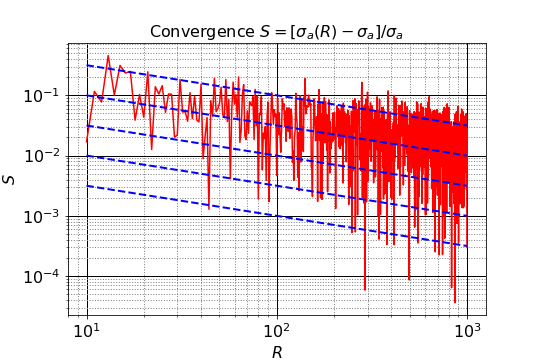